# Obdelava podatkov

## Začetne priprave

Uvozim vse potrebne datoteke. *books.csv* je glavna datotetka. V njej so shranjeni naslovi del, število shranitev na polico (to je številka, ki pove, kolikokrat so uporabniki spletne strani delo dodali na eno izmed svojih polic), povprečna ocena, število ocen ter leto izida. V *authors.csv* so shranjena imena avtorjev v odvisnosti od del. V *series.csv* pa so shranjena imena serij in številka izvoda, prav tako v odvisnosti od imena dela. 

In [1]:
import pandas as pd
import numpy as np

knjige = pd.read_csv('edited_data/books.csv', index_col='title')
avtorji = pd.read_csv('edited_data/authors.csv', index_col='title')
serije = pd.read_csv('edited_data/series.csv', index_col='title')

pd.options.display.max_rows = 20

%matplotlib inline

In [2]:
def zaokrozi(tabela):
    tabela.avg_rating = tabela.avg_rating.round(2)
    tabela.rounded_avg = tabela.rounded_avg.round(1)
    for column in ['shelved', 'ratings', 'published', 'decade']:
        try:
            tabela[column] = tabela[column].round().astype(int)
        except KeyError:
            pass
    try:
        tabela['decade'] = 10 * (tabela['decade'] // 10)
    except KeyError:
        pass

## Dodatni stolpci

Za boljšo preglednost grafov v nadaljevanju definiram nekaj dodatnih stolpcev. Stolpec *decade* razvrsti dela v desetletja izida, stolpec *rounded_avg* pa hrani ocene zaokrožene na eno decimalko.

In [3]:
knjige['decade'] = 10 * (knjige.published // 10)
knjige['rounded_avg'] = round(knjige.avg_rating, 1)

## Troje tabel

Za začetek sem izpisal tabele kot nastopajo v treh datotekah, da dajo bralcu občutek za podatke.

In [4]:
knjige

,shelved,avg_rating,ratings,published,decade,rounded_avg
title,,,,,,
Harry Potter and the Sorcerer's Stone,52905,4.46,5732236,1997,1990,4.5
The Hobbit,45536,4.26,2468952,1937,1930,4.3
Harry Potter and the Chamber of Secrets,44479,4.40,2221594,1998,1990,4.4
Harry Potter and the Prisoner of Azkaban,44271,4.55,2272006,1999,1990,4.6
Harry Potter and the Goblet of Fire,42930,4.54,2127081,2000,2000,4.5
Harry Potter and the Deathly Hallows,41731,4.63,2112970,2007,2000,4.6
Harry Potter and the Half-Blood Prince,41484,4.56,2034085,2005,2000,4.6
Harry Potter and the Order of the Phoenix,41451,4.48,2083929,2003,2000,4.5
A Game of Thrones,39952,4.45,1694730,1996,1990,4.4


In [5]:
avtorji

,author
title,
Harry Potter and the Sorcerer's Stone,J.K. Rowling
The Hobbit,J.R.R. Tolkien
Harry Potter and the Chamber of Secrets,J.K. Rowling
Harry Potter and the Prisoner of Azkaban,J.K. Rowling
Harry Potter and the Goblet of Fire,J.K. Rowling
Harry Potter and the Deathly Hallows,J.K. Rowling
Harry Potter and the Half-Blood Prince,J.K. Rowling
Harry Potter and the Order of the Phoenix,J.K. Rowling
A Game of Thrones,George R.R. Martin


In [6]:
serije

,series,volume
title,,
Harry Potter and the Sorcerer's Stone,Harry Potter,1
Harry Potter and the Chamber of Secrets,Harry Potter,2
Harry Potter and the Prisoner of Azkaban,Harry Potter,3
Harry Potter and the Goblet of Fire,Harry Potter,4
Harry Potter and the Deathly Hallows,Harry Potter,7
Harry Potter and the Half-Blood Prince,Harry Potter,6
Harry Potter and the Order of the Phoenix,Harry Potter,5
A Game of Thrones,A Song of Ice and Fire,1
The Fellowship of the Ring,The Lord of the Rings,1


## Celotna tabela

Podatke sem združil v eno tabelo, razvrščeno glede na povprečno oceno.

In [7]:
celotna_tabela = pd.merge(pd.merge(knjige, avtorji, how='outer', on='title'),
                          serije, how='outer', on='title', sort=True)

knjige_in_avtorji = pd.merge(knjige, avtorji, how='outer', on='title')
knjige_in_serije = pd.merge(knjige, serije, how='outer', on='title')
serije_in_avtorji = pd.merge(serije, avtorji, how='outer', on='title')

celotna_tabela.sort_values(['avg_rating', 'ratings'], ascending=[False, False])

,shelved,avg_rating,ratings,published,decade,rounded_avg,author,series,volume
title,,,,,,,,,
Words of Radiance,6838,4.77,149211,2014,2010,4.8,Brandon Sanderson,The Stormlight Archive,2
Harry Potter Series Box Set,2999,4.74,224267,2015,2010,4.7,J.K. Rowling,NaN,NaN
A Court of Mist and Fury,7942,4.69,210559,2016,2010,4.7,Sarah J. Maas,A Court of Thorns and Roses,2
The Way of Kings,11472,4.65,219526,2010,2010,4.6,Brandon Sanderson,The Stormlight Archive,1
Kingdom of Ash,2458,4.65,50956,2018,2010,4.6,Sarah J. Maas,Throne of Glass,7
Oathbringer,3638,4.64,68627,2017,2010,4.6,Brandon Sanderson,The Stormlight Archive,3
Assassin's Fate,1267,4.64,19918,2017,2010,4.6,Robin Hobb,The Fitz and the Fool,3
Harry Potter and the Deathly Hallows,41731,4.63,2112970,2007,2000,4.6,J.K. Rowling,Harry Potter,7
Crooked Kingdom,6528,4.62,105493,2016,2010,4.6,Leigh Bardugo,Six of Crows,2


## Povprečja desetletij

Knjige sem združil v skupine, glede na desetletje, v katerem so bile izdane. Pogledal sem število del v vsakem desetletju in izračunal povprečne vrednosti, ki sem jih primerno zaokrožil.

In [8]:
knjige_po_desetletjih = knjige.groupby('decade')

In [9]:
povprecja_desetletij = knjige_po_desetletjih.mean().sort_values('decade', ascending=False)

zaokrozi(povprecja_desetletij)
    
povprecja_desetletij

,shelved,avg_rating,ratings,published,rounded_avg
decade,,,,,
2010,2651,4.11,93601,2013,4.1
2000,3826,4.06,189018,2005,4.1
1990,4209,4.12,150056,1994,4.1
1980,2877,4.07,102796,1985,4.1
1970,2949,4.06,134465,1975,4.1
1960,3649,4.11,226592,1965,4.1
1950,12507,4.20,567413,1954,4.2
1940,2849,4.04,1115462,1945,4.0
1930,23308,4.08,1245216,1938,4.1


Število del je v drugi polovici 20. stoletja začelo eksponentno naraščati. To lahko kaže na povečano priljubljenost fantazijskih del, da današnji bralci bolje poznajo novejša dela (pri tem je treba upoštevati, da seznam sestavljen glede na ocene uporabnikov strani Goodreads), ali da fantazijska dela postajajo vedno bolj priljublena in se je zato njihovo število povečalo. Najbrž pa na porast števila fantazijske literature v neki meri vplivajo vsi trije dejavniki.

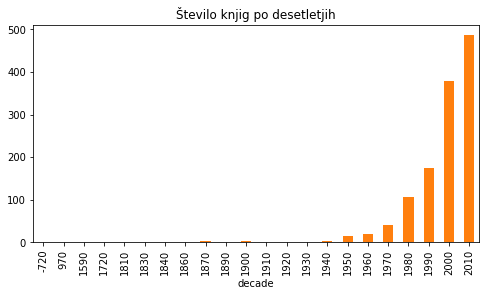

In [10]:
knjige_po_desetletjih.size().plot.bar(x='decade', y=None, color='C1', title='Število knjig po desetletjih', figsize=(8, 4))

Začetnik trenda je nedvomno John Roland Reul Tolkien, saj se njegova najpomembnejša dela - *The Hobbit* in trilogija *The Lord of the Rings* - nahajajo na samem začetku krivulje.

In [11]:
celotna_tabela[celotna_tabela.author == 'J.R.R. Tolkien'].sort_values('published')[['published', 'series']]

,published,series
title,,
The Hobbit,1937,NaN
The Fellowship of the Ring,1954,The Lord of the Rings
The Two Towers,1954,The Lord of the Rings
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings,1955,NaN
The Lord of the Rings,1955,NaN
The Return of the King,1955,The Lord of the Rings
The Silmarillion,1977,NaN
Unfinished Tales of Númenor and Middle-Earth,1980,NaN
"The Book of Lost Tales, Part One",1984,The History of Middle-Earth


Zanimalo me je, kako se je povprečna ocena spreminjala skozi čas. Izkazalo se je, da je bila varijacija zanemarljiva, o čemer pričata naslednja podatka.

In [12]:
print('Povprečna vrednost: ', knjige_po_desetletjih['avg_rating'].mean().mean().round(3),
      '\nVarianca:           ', knjige_po_desetletjih['avg_rating'].mean().var().round(3),
      '\nStandardni odklon:  ', knjige_po_desetletjih['avg_rating'].mean().std().round(3))

Povprečna vrednost:  3.984 
Varianca:            0.04 
Standardni odklon:   0.199


Z naslednjega grafa lahko razberemo, da so poznejše knjige priča večji raznolikosti ocen, na kar najverjetneje vpliva večje število del v zadnjih desetletjih. Izstopa desetletje 1810, v katerega se uvrščata le dve zelo različno ocenjeni knjigi. Več desetletji je tudi praznih, ker variance in posledično standardnega odklona ni mogoče računati na enem samem podatku.

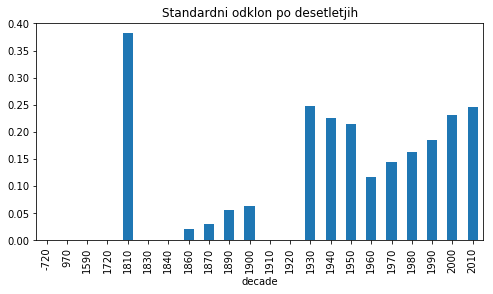

In [13]:
knjige_po_desetletjih['avg_rating'].std().plot.bar(color='C0', title='Standardni odklon po desetletjih', figsize=(8, 4))

In [14]:
knjige[knjige.decade == 1810]['avg_rating']

title
Frankenstein                        3.77
The Complete Grimm's Fairy Tales    4.31
Name: avg_rating, dtype: float64

## Odvisnosti od ocene

Graf števila knjig v odvisnosti od ocene ustreza Gaussovi razporeditvi. Vendar je premaknjen, s središčem v 4 in minimumom pri 3,3. Glede na to lahko presodimo, da uporabniki spletne strani Goodreads knjig ne ocenjujejo preveč strogo. Druga možna interpretacija bi bila, da so knjige na tem seznamu nadpovprečno dobre. 

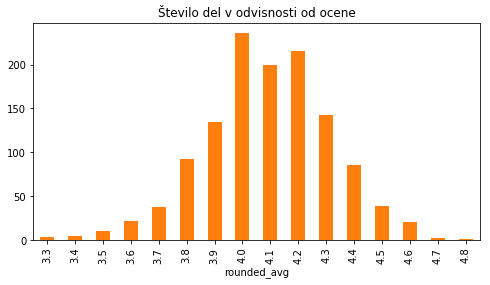

In [26]:
knjige.groupby('rounded_avg').size().plot.bar(color='C1', title='Število del v odvisnosti od ocene', figsize=(8, 4))

Prvi izmed spodnjih grafov kaže, da uporabniki *shranjujejo na polico* predvsem knjige s srednjo oceno, pri čemer se krivulja rahlo nagiba nasproti bolje ocenjenim delom. Zanimiva je tudi opazka, da grafa izgledata zelo simetrično.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0CBCD9D0>,
      dtype=object)

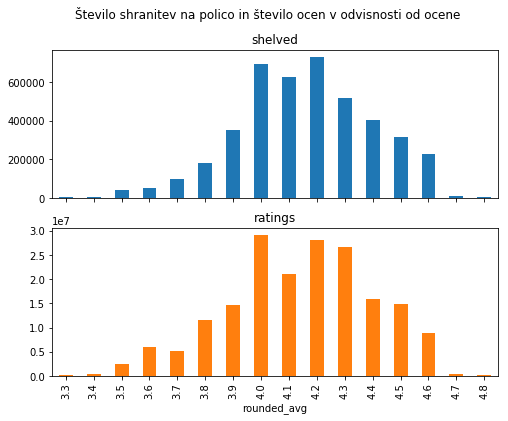

In [16]:
knjige.groupby('rounded_avg').sum()[['shelved', 'ratings']].plot.bar(
    subplots=True, legend=False, title='Število shranitev na polico in število ocen v odvisnosti od ocene',
    figsize=(8, 6)
)

## Število del v serijah in na avtorja

In [17]:
celotna_tabela.groupby('series').size().sort_values(ascending=False)

series
Discworld                              35
The Dresden Files                      14
Sookie Stackhouse                      13
Wheel of Time                          13
Legend of Drizzt                       13
House of Night                         10
The Sandman                            10
Sword of Truth                         10
Malazan Book of the Fallen              9
Ranger's Apprentice                     9
                                       ..
The Prince of Nothing                   1
Paranormalcy                            1
Oz                                      1
The Princesses of Westfalin Trilogy     1
Of Fire and Stars                       1
October Daye                            1
Night Vale                              1
Night Huntress                          1
Newsoul                                 1
Riverside                               1
Length: 463, dtype: int64

Na naslednjem seznamu s 73 knjigami izstopa Sir Terry Prachet. Razglog za to je, poleg obsežnosti njegovega pisanja, moja napaka pri stikanju tabel. Je namreč edini avtor na celotnem seznamu, ki knjigam pripiše dvoje serij - vsaka je del glavne serije, *Discworld*, in manjše podserije. Resnična številka, ki je prav tako zavidanja vredna, je 35 del.

In [18]:
celotna_tabela.groupby('author').size().sort_values()

author
A.G. Howard            1
Katharine Kerr         1
Katherine Addison      1
Katherine Paterson     1
Kazuo Ishiguro         1
Kelly Barnhill         1
Ken Liu                1
Kenneth Grahame        1
Yann Martel            1
Kieron Gillen          1
                      ..
Robin Hobb            17
David Eddings         18
Rick Riordan          19
Brandon Sanderson     20
Mercedes Lackey       21
Jim Butcher           22
Neil Gaiman           23
Tamora Pierce         25
R.A. Salvatore        25
Terry Pratchett       73
Length: 385, dtype: int64

## Top 10

V zadnjem razdelku so zbrani seznami deset najbolje ocenjenih del, avtorje in serij glede na njihovo povprečno oceno. Tabeli o desetih sta dve, pri čemer druga vsebuje bolj poznane knjige, kjer je kriterij *število shranitev na polico*.

In [19]:
povprecja_serij = celotna_tabela.groupby('series').mean().sort_values('avg_rating', ascending=False)
zaokrozi(povprecja_serij)

povprecja_avtorjev = celotna_tabela.groupby('author').mean().sort_values('avg_rating', ascending=False)
zaokrozi(povprecja_avtorjev)

### Deset najbolje ocenjenih knjig



In [20]:
print(knjige.sort_values(['avg_rating', 'ratings'], ascending=[False, False]).head(10).avg_rating,
      '\n\n',
      knjige[(knjige.ratings >= 500000)].sort_values('avg_rating', ascending=False).head(10).avg_rating)

title
Words of Radiance                       4.77
Harry Potter Series Box Set             4.74
A Court of Mist and Fury                4.69
The Way of Kings                        4.65
Kingdom of Ash                          4.65
Oathbringer                             4.64
Assassin's Fate                         4.64
Harry Potter and the Deathly Hallows    4.63
Crooked Kingdom                         4.62
The Wicked King                         4.61
Name: avg_rating, dtype: float64 

 title
Harry Potter and the Deathly Hallows         4.63
Harry Potter and the Half-Blood Prince       4.56
The Name of the Wind                         4.55
Harry Potter and the Prisoner of Azkaban     4.55
Harry Potter and the Goblet of Fire          4.54
A Storm of Swords                            4.54
The Return of the King                       4.52
The Last Olympian                            4.50
Harry Potter and the Order of the Phoenix    4.48
Harry Potter and the Sorcerer's Stone        4.46
Na

### Deset najbolje ocenjenih avtorjev

In [21]:
povprecja_avtorjev.head(10).avg_rating

author
Chuck Dixon          4.48
Brian K. Vaughan     4.44
J.K. Rowling         4.43
Sarah J. Maas        4.42
Jessica  Townsend    4.39
Neal Shusterman      4.36
Nicholas Eames       4.36
Pierce Brown         4.36
Brandon Sanderson    4.36
Alan Moore           4.35
Name: avg_rating, dtype: float64

### Deset najbolje ocenjenih serij



In [22]:
povprecja_serij.head(10).avg_rating

series
The Stormlight Archive         4.69
The Fitz and the Fool          4.64
The Kingkiller Chronicle       4.56
Six of Crows                   4.54
The Fitz and The Fool          4.51
Throne of Glass                4.49
The Dark Artifices             4.49
A Court of Thorns and Roses    4.49
The Infernal Devices           4.46
The Sandman                    4.45
Name: avg_rating, dtype: float64

### Deset najslabše ocenjenih knjig, avtorjev in serij

In [23]:
print(knjige.sort_values(['avg_rating', 'ratings'], ascending=[False, False]).tail(10).avg_rating,
      '\n\n',
      knjige[(knjige.ratings >= 500000)].sort_values('avg_rating', ascending=False).tail(10).avg_rating,
      '\n\n',
      povprecja_avtorjev.tail(10).avg_rating,
      '\n\n',
      povprecja_serij.tail(10).avg_rating)

title
The Buried Giant                   3.47
Son of a Witch                     3.46
Ever                               3.44
Shaman's Crossing                  3.44
Beowulf                            3.43
Dead Ever After                    3.43
Forest Mage                        3.38
A Lion Among Men                   3.30
Pride and Prejudice and Zombies    3.29
Mirror Mirror                      3.28
Name: avg_rating, dtype: float64 

 title
Frankenstein                                                  3.77
The Odyssey                                                   3.75
Breaking Dawn                                                 3.70
Eclipse                                                       3.69
Harry Potter and the Cursed Child: Parts One and Two          3.69
Matched                                                       3.67
Allegiant                                                     3.63
Twilight                                                      3.58
New Moon        

Mogoče ni presenetljivo, da so med najslabše ocenjenimi knjigami tri iz serije *Twilight*. Tudi naslov serije in istoimenske knjiga *Pride and Prejudice and Zombies*, ki sta končali na zadnjem in predzadnjem mestu, ne zveni preveč obetavno.

In [24]:
celotna_tabela[celotna_tabela.author == 'Stephenie Meyer']

,shelved,avg_rating,ratings,published,decade,rounded_avg,author,series,volume
title,,,,,,,,,
Breaking Dawn,10467,3.70,1167426,2008,2000,3.7,Stephenie Meyer,Twilight,4
Eclipse,10892,3.69,1255967,2007,2000,3.7,Stephenie Meyer,Twilight,3
Midnight Sun,1493,4.03,140963,2008,2000,4.0,Stephenie Meyer,NaN,NaN
New Moon,11334,3.53,1282110,2006,2000,3.5,Stephenie Meyer,Twilight,2
The Host,3729,3.84,817175,2008,2000,3.8,Stephenie Meyer,The Host,1
The Short Second Life of Bree Tanner,2175,3.50,167490,2009,2000,3.5,Stephenie Meyer,NaN,NaN
Twilight,15791,3.58,4338808,2005,2000,3.6,Stephenie Meyer,Twilight,1
